In [16]:
import pandas as pd
import numpy as np
from statistics import variance
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv("/Users/shivanimudhelli/Downloads/US_births_1994-2003_CDC_NCHS.csv", header=0)
#data = data[data['year'] >= 2000] # only consider data from 2000 to 2004


In [18]:
data_mth = pd.DataFrame(data.groupby(by= 'month')["births"].sum())
births = data_mth["births"]
birth_mean = births.mean()
birth_var = variance(births)



<AxesSubplot: >

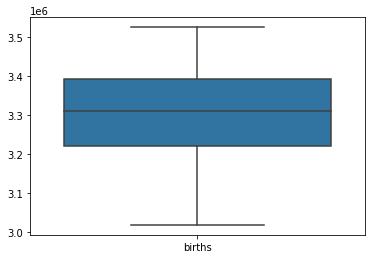

In [19]:
# quartiles for birth data 2000 to 2004
sns.boxplot(pd.DataFrame(births))


In [20]:
# actual values
q3_a, q1_a = np.percentile(births, [75,25])
iqr_actual = q3_a-q1_a
print('Actual IQR: ', iqr_actual)

mad_actual = births.mad()
print('Actual MAD: ', mad_actual)

Actual IQR:  173318.75
Actual MAD:  109176.75


In [21]:
#sampling from poisson distribution for IQR

sample_iqrp = []

#y = np.random.poisson(birth_mean, 1000) # using mean because mean = variance in poisson distribution

for i in range(10000):
    boot_pois_samp = np.random.poisson(birth_mean, size = 100)
    # boot_mean = np.mean(boot_samp)
    # sample_vars.append(boot_mean)
    q3p, q1p = np.percentile(boot_pois_samp, [75,25])
    boot_iqr = q3p - q1p
    sample_iqrp.append(boot_iqr)
print(sample_iqrp)


[2908.0, 2444.25, 2232.0, 2528.25, 2365.25, 2537.25, 2460.25, 2161.5, 2662.75, 2369.0, 2335.0, 2004.5, 2132.75, 2664.5, 2148.25, 2293.5, 2400.25, 2073.75, 2110.25, 2503.5, 2299.75, 2503.0, 2391.5, 2130.0, 2368.5, 2358.75, 2265.0, 2536.75, 2178.75, 2595.5, 2409.25, 1992.0, 2719.5, 2491.25, 2347.75, 2278.5, 2392.25, 2629.25, 2025.5, 2563.5, 2618.0, 2067.0, 2016.75, 2536.75, 2351.0, 2344.75, 2222.0, 2352.0, 2393.0, 2294.25, 2377.0, 2431.5, 2345.5, 2298.25, 2537.75, 2553.0, 2290.75, 2470.25, 2605.0, 2401.5, 2342.25, 2405.75, 2698.25, 2571.5, 2397.25, 2292.75, 2337.25, 2709.75, 2130.25, 2682.25, 2505.0, 2339.25, 1973.75, 2313.75, 2542.5, 2091.75, 2427.5, 2429.75, 2877.5, 2406.5, 2231.25, 2089.25, 2456.0, 2675.0, 2526.5, 2283.25, 2249.0, 2782.25, 2558.0, 1791.5, 2322.0, 2470.25, 1948.0, 2104.0, 2325.25, 2255.5, 2522.75, 2160.0, 2567.0, 2239.25, 1790.0, 2664.25, 2276.75, 2297.0, 2065.25, 2425.5, 2564.0, 2302.75, 1842.25, 2510.25, 2454.5, 2473.0, 2394.75, 2265.25, 2553.5, 2395.0, 2342.75, 2278

Text(0.5, 1.0, 'IQR from Sampled Poisson Distribution (10,000 resamples)')

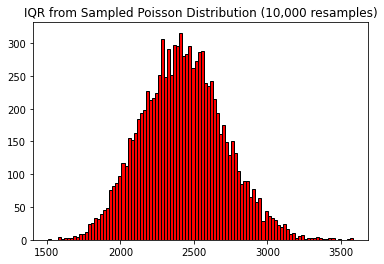

In [22]:
ax3 = plt.hist(sample_iqrp, bins = 100, edgecolor='black', color='red')
plt.title("IQR from Sampled Poisson Distribution (10,000 resamples)")

In [23]:
#sampling from poisson distribution for MAD

sample_madp = []

#y = np.random.poisson(birth_mean, 1000) # using mean because mean = variance in poisson distribution

for i in range(10000):
    boot_pois_samp2 = np.random.poisson(birth_mean, size = 100)
    boot_pois_mad = pd.Series(boot_pois_samp).mad()
    sample_madp.append(boot_pois_mad)
print(sample_madp)

[1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200000003, 1470.013200

Text(0.5, 1.0, 'MAD from Sampled Poisson Distribution (10,000 resamples)')

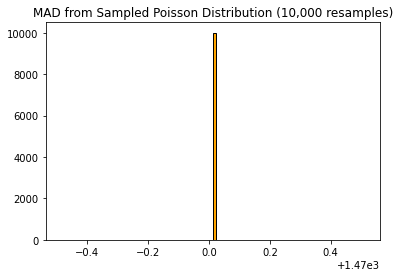

In [24]:
ax4 = plt.hist(sample_madp, bins = 100, edgecolor='black', color='orange')
plt.title("MAD from Sampled Poisson Distribution (10,000 resamples)")

In [30]:
# bootstrap for iqr
sample_iqr = []
for j in range(0,10000):
    boot_samples = births.sample(n=12, replace=True)
    q3, q1 = np.percentile(boot_samples, [75,25])
    boot_iqr = q3 - q1
    sample_iqr.append(boot_iqr)

print(np.mean(sample_iqr))
print(variance(sample_iqr))

168609.038825
4163663815.2166705


Text(0, 0.5, 'Frequency')

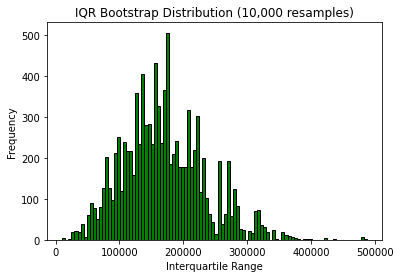

In [26]:
# plot iqr of resamples
ax1 = plt.hist(sample_iqr, bins = 100, edgecolor='black', color = 'green')
plt.title("IQR Bootstrap Distribution (10,000 resamples)")
plt.xlabel("Interquartile Range")
plt.ylabel("Frequency")


In [31]:
# bootstrap for mad
sample_mad = []
for k in range(0,10000):
    boot_samples2 = births.sample(n=12, replace=True)
    boot_mad = boot_samples2.mad()
    sample_mad.append(boot_mad)
    
print(np.mean(sample_mad))
print(variance(sample_mad))

print(variance(sample_iqr) > variance(sample_mad))

106305.88485277777
590122514.0743473
True


In [32]:
print(np.mean(sample_iqr)-iqr_actual)
print(np.mean(sample_mad)-mad_actual)

-4709.711175000004
-2870.8651472222264


Text(0, 0.5, 'Frequency')

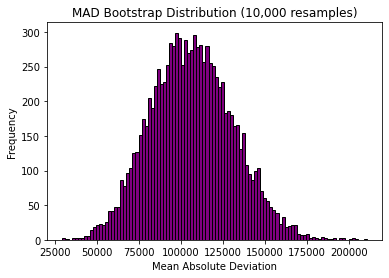

In [28]:
# plot mad of resamples
ax2 = plt.hist(sample_mad, bins = 100, edgecolor='black', color = 'purple')
plt.title("MAD Bootstrap Distribution (10,000 resamples)")
plt.xlabel("Mean Absolute Deviation")
plt.ylabel("Frequency")